# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

import time
from tqdm import tqdm
import os
import pickle

from chart_studio import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]


project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
55660        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
76127       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

      school_state                Date project_grade_category  \
55660           CA 2016-04-27 00:27:36          Grades PreK-2   
76127           UT 2016-04-27 00:31:25             Grades 3-5   

      project_subject_categories            project_subject_subcategories  \
55660             Math & Science  Applied Sciences, Health & Life Science   
76127              Special Needs                            Special Needs   

                                      project_title  \
55660  Engineering STEAM into the Primary Classroom   
76127                       Sensory Tools for Focus   

                                         project_essay_1  \
55660  I have been fortunate enough to use the Fairy ...   
76127  Imagine being 8-9 years old. You're in your th...   

                                         project_essay_2  \
55660  My students come from a variety of backgrounds...   
76127  Most of my students have autism, anxiety, anot...   

                                         project_essay_3  \
55660  Each month I try to do several science or STEM...   
76127  It is tough to do more than one thing at a tim...   

                                         project_essay_4  \
55660  It is challenging to develop high quality scie...   
76127  When my students are able to calm themselves d...   

                                project_resource_summary  \
55660  My students need STEM kits to learn critical s...   
76127  My students need Boogie Boards for quiet senso...   

       teacher_number_of_previously_posted_projects  project_is_approved  
55660                                            53                    1  
76127                                             4                    1

In [5]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
print(resource_data.head(2))

# https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
price_data = resource_data.groupby('id').agg({'quantity':'sum', 'price':'sum'}).reset_index()

# Join two data frames
project_data = pd.merge(project_data, price_data, on='id', how='left')
project_data.head(5)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']
        id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95  


Unnamed: 0       id                        teacher_id teacher_prefix  \
0        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
1       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   
2       74477  p189804  4a97f3a390bfe21b99cf5e2b81981c73           Mrs.   
3      100660  p234804  cbc0e38f522143b86d372f8b43d4cff3           Mrs.   
4       33679  p137682  06f6e62e17de34fcf81020c77549e1d5           Mrs.   

  school_state                Date project_grade_category  \
0           CA 2016-04-27 00:27:36          Grades PreK-2   
1           UT 2016-04-27 00:31:25             Grades 3-5   
2           CA 2016-04-27 00:46:53          Grades PreK-2   
3           GA 2016-04-27 00:53:00          Grades PreK-2   
4           WA 2016-04-27 01:05:25             Grades 3-5   

  project_subject_categories            project_subject_subcategories  \
0             Math & Science  Applied Sciences, Health & Life Science   
1              Special Needs                            Special Needs   
2        Literacy & Language                                 Literacy   
3           Applied Learning                        Early Development   
4        Literacy & Language                                 Literacy   

                                    project_title  \
0    Engineering STEAM into the Primary Classroom   
1                         Sensory Tools for Focus   
2  Mobile Learning with a Mobile Listening Center   
3          Flexible Seating for Flexible Learning   
4          Going Deep: The Art of Inner Thinking!   

                                     project_essay_1  \
0  I have been fortunate enough to use the Fairy ...   
1  Imagine being 8-9 years old. You're in your th...   
2  Having a class of 24 students comes with diver...   
3  I recently read an article about giving studen...   
4  My students crave challenge, they eat obstacle...   

                                     project_essay_2  \
0  My students come from a variety of backgrounds...   
1  Most of my students have autism, anxiety, anot...   
2  I have a class of twenty-four kindergarten stu...   
3  I teach at a low-income (Title 1) school. Ever...   
4  We are an urban, public k-5 elementary school....   

                                     project_essay_3  \
0  Each month I try to do several science or STEM...   
1  It is tough to do more than one thing at a tim...   
2  By having a mobile listening and storage cente...   
3  We need a classroom rug that we can use as a c...   
4  With the new common core standards that have b...   

                                     project_essay_4  \
0  It is challenging to develop high quality scie...   
1  When my students are able to calm themselves d...   
2  A mobile listening center will help keep equip...   
3  Benjamin Franklin once said, \"Tell me and I f...   
4  These remarkable gifts will provide students w...   

                            project_resource_summary  \
0  My students need STEM kits to learn critical s...   
1  My students need Boogie Boards for quiet senso...   
2  My students need a mobile listening center to ...   
3  My students need flexible seating in the class...   
4  My students need copies of the New York Times ...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                            53                    1   
1                                             4                    1   
2                                            10                    1   
3                                             2                    1   
4                                             2                    1   

   quantity   price  
0         4  725.05  
1         8  213.03  
2         1  329.00  
3         9  481.04  
4        14   17.74

## 1.2 preprocessing of `project_subject_categories`

In [6]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [7]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [8]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [9]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
1       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

  school_state                Date project_grade_category  \
0           CA 2016-04-27 00:27:36          Grades PreK-2   
1           UT 2016-04-27 00:31:25             Grades 3-5   

                                  project_title  \
0  Engineering STEAM into the Primary Classroom   
1                       Sensory Tools for Focus   

                                     project_essay_1  \
0  I have been fortunate enough to use the Fairy ...   
1  Imagine being 8-9 years old. You're in your th...   

                                     project_essay_2  \
0  My students come from a variety of backgrounds...   
1  Most of my students have autism, anxiety, anot...   

                                     project_essay_3  \
0  Each month I try to do several science or STEM...   
1  It is tough to do more than one thing at a tim...   

                                     project_essay_4  \
0  It is challenging to develop high quality scie...   
1  When my students are able to calm themselves d...   

                            project_resource_summary  \
0  My students need STEM kits to learn critical s...   
1  My students need Boogie Boards for quiet senso...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                            53                    1   
1                                             4                    1   

   quantity   price clean_categories                 clean_subcategories  \
0         4  725.05     Math_Science  AppliedSciences Health_LifeScience   
1         8  213.03     SpecialNeeds                        SpecialNeeds   

                                               essay  
0  I have been fortunate enough to use the Fairy ...  
1  Imagine being 8-9 years old. You're in your th...

In [10]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [11]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

I have been fortunate enough to use the Fairy Tale STEM kits in my classroom as well as the STEM journals, which my students really enjoyed.  I would love to implement more of the Lakeshore STEM kits in my classroom for the next school year as they provide excellent and engaging STEM lessons.My students come from a variety of backgrounds, including language and socioeconomic status.  Many of them don't have a lot of experience in science and engineering and these kits give me the materials to provide these exciting opportunities for my students.Each month I try to do several science or STEM/STEAM projects.  I would use the kits and robot to help guide my science instruction in engaging and meaningful ways.  I can adapt the kits to my current language arts pacing guide where we already teach some of the material in the kits like tall tales (Paul Bunyan) or Johnny Appleseed.  The following units will be taught in the next school year where I will implement these kits: magnets, motion, si

In [12]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [13]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

\"A person is a person, no matter how small.\" (Dr.Seuss) I teach the smallest students with the biggest enthusiasm for learning. My students learn in many different ways using all of our senses and multiple intelligences. I use a wide range of techniques to help all my students succeed. \r\nStudents in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures, including Native Americans.\r\nOur school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom. Kindergarteners in my class love to work with hands-on materials and have many different opportunities to practice a skill before it is mastered. Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum.Montana is the perfect place to learn about agriculture and nutrition. My students love to role play in our pretend kitchen in the ear

In [14]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

 A person is a person, no matter how small.  (Dr.Seuss) I teach the smallest students with the biggest enthusiasm for learning. My students learn in many different ways using all of our senses and multiple intelligences. I use a wide range of techniques to help all my students succeed.   Students in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures, including Native Americans.  Our school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom. Kindergarteners in my class love to work with hands-on materials and have many different opportunities to practice a skill before it is mastered. Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum.Montana is the perfect place to learn about agriculture and nutrition. My students love to role play in our pretend kitchen in the early chi

In [15]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

 A person is a person no matter how small Dr Seuss I teach the smallest students with the biggest enthusiasm for learning My students learn in many different ways using all of our senses and multiple intelligences I use a wide range of techniques to help all my students succeed Students in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures including Native Americans Our school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom Kindergarteners in my class love to work with hands on materials and have many different opportunities to practice a skill before it is mastered Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum Montana is the perfect place to learn about agriculture and nutrition My students love to role play in our pretend kitchen in the early childhood classroom

In [16]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [17]:
# Create function that will filter sentance
def filterSentance(sentance):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    sent = sent.lower()
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    return sent.strip()

In [18]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    preprocessed_essays.append(filterSentance(sentance))

100%|██████████| 109248/109248 [00:59<00:00, 1821.58it/s]


In [19]:
# after preprocesing
preprocessed_essays[20000]

'person person no matter small dr seuss teach smallest students biggest enthusiasm learning students learn many different ways using senses multiple intelligences use wide range techniques help students succeed students class come variety different backgrounds makes wonderful sharing experiences cultures including native americans school caring community successful learners seen collaborative student project based learning classroom kindergarteners class love work hands materials many different opportunities practice skill mastered social skills work cooperatively friends crucial aspect kindergarten curriculum montana perfect place learn agriculture nutrition students love role play pretend kitchen early childhood classroom several kids ask try cooking real food take idea create common core cooking lessons learn important math writing concepts cooking delicious healthy food snack time students grounded appreciation work went making food knowledge ingredients came well healthy bodies pr

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [20]:
# similarly you can preprocess the titles also
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    preprocessed_titles.append(filterSentance(sentance))

100%|██████████| 109248/109248 [00:02<00:00, 42371.51it/s]


In [21]:
# after preprocessing
print(preprocessed_titles[20000])

health nutritional cooking kindergarten


In [22]:
# similarly you can preprocess the project_resource_summary also
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_resource_summary = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_resource_summary'].values):
    preprocessed_resource_summary.append(filterSentance(sentance))

100%|██████████| 109248/109248 [00:06<00:00, 16231.19it/s]


In [23]:
# after preprocessing
print(preprocessed_resource_summary[20000])

students need cooking supplies help us healthy learn nutrition mixer apple spiralizer kitchen tools nutrition kit kid friendly healthy literature ink make cookbooks


In [24]:
# Preprocess teacher_prefix
from tqdm import tqdm
preprocessed_teacher_prefix = []
# tqdm is for printing the status bar
for teacher_prefix in tqdm(project_data['teacher_prefix'].values):
    teacher_prefix = str(teacher_prefix)
    clean_teacher_prefix = decontracted(teacher_prefix)
    clean_teacher_prefix = clean_teacher_prefix.replace('\\r', ' ')
    clean_teacher_prefix = clean_teacher_prefix.replace('\\"', ' ')
    clean_teacher_prefix = clean_teacher_prefix.replace('\\n', ' ')
    clean_teacher_prefix = re.sub('[^A-Za-z0-9]+', ' ', clean_teacher_prefix)
    clean_teacher_prefix = clean_teacher_prefix.lower()
    if clean_teacher_prefix in stopwords:
        continue
    preprocessed_teacher_prefix.append(clean_teacher_prefix.strip())

100%|██████████| 109248/109248 [00:01<00:00, 61923.06it/s]


In [25]:
preprocessed_teacher_prefix[0:10]

['mrs', 'ms', 'mrs', 'mrs', 'mrs', 'mrs', 'mrs', 'ms', 'ms', 'mrs']

In [26]:
# Preprocess project_grade_category
from tqdm import tqdm
preprocessed_project_grade_category = []
# tqdm is for printing the status bar
for project_grade_category in tqdm(project_data['project_grade_category'].values):
    project_grade_category = str(project_grade_category)
    clean_project_grade_category = decontracted(project_grade_category)
    clean_project_grade_category = clean_project_grade_category.replace('\\r', ' ')
    clean_project_grade_category = clean_project_grade_category.replace('\\"', ' ')
    clean_project_grade_category = clean_project_grade_category.replace('\\n', ' ')
    clean_project_grade_category = re.sub('[^A-Za-z0-9]+', ' ', clean_project_grade_category)
    clean_project_grade_category = clean_project_grade_category.lower()
    if clean_project_grade_category in stopwords:
        continue
    clean_project_grade_category = clean_project_grade_category.strip()
#     whitespace are creating problems because we are treating this as categorical feature    
    preprocessed_project_grade_category.append(clean_project_grade_category.replace(' ', '_'))

100%|██████████| 109248/109248 [00:03<00:00, 34930.81it/s]


In [27]:
preprocessed_project_grade_category[0:10]

['grades_prek_2',
 'grades_3_5',
 'grades_prek_2',
 'grades_prek_2',
 'grades_3_5',
 'grades_3_5',
 'grades_3_5',
 'grades_3_5',
 'grades_prek_2',
 'grades_3_5']

In [28]:
# Replace original columns with preprocessed column values
project_data['clean_essays'] = preprocessed_essays
project_data['clean_titles'] = preprocessed_titles
project_data['project_resource_summary'] = preprocessed_resource_summary
project_data['teacher_prefix'] = preprocessed_teacher_prefix
project_data['project_grade_category'] = preprocessed_project_grade_category
# Drop essays column
project_data.drop(['project_essay_1'], axis=1, inplace=True)
project_data.drop(['project_essay_2'], axis=1, inplace=True)
project_data.drop(['project_essay_3'], axis=1, inplace=True)
project_data.drop(['project_essay_4'], axis=1, inplace=True)

In [29]:
project_data.head(5)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5            mrs   
1       37728  p043609  3f60494c61921b3b43ab61bdde2904df             ms   
2       74477  p189804  4a97f3a390bfe21b99cf5e2b81981c73            mrs   
3      100660  p234804  cbc0e38f522143b86d372f8b43d4cff3            mrs   
4       33679  p137682  06f6e62e17de34fcf81020c77549e1d5            mrs   

  school_state                Date project_grade_category  \
0           CA 2016-04-27 00:27:36          grades_prek_2   
1           UT 2016-04-27 00:31:25             grades_3_5   
2           CA 2016-04-27 00:46:53          grades_prek_2   
3           GA 2016-04-27 00:53:00          grades_prek_2   
4           WA 2016-04-27 01:05:25             grades_3_5   

                                    project_title  \
0    Engineering STEAM into the Primary Classroom   
1                         Sensory Tools for Focus   
2  Mobile Learning with a Mobile Listening Center   
3          Flexible Seating for Flexible Learning   
4          Going Deep: The Art of Inner Thinking!   

                            project_resource_summary  \
0  students need stem kits learn critical science...   
1  students need boogie boards quiet sensory brea...   
2  students need mobile listening center able enh...   
3  students need flexible seating classroom choos...   
4  students need copies new york times best selle...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                            53                    1   
1                                             4                    1   
2                                            10                    1   
3                                             2                    1   
4                                             2                    1   

   quantity   price   clean_categories                 clean_subcategories  \
0         4  725.05       Math_Science  AppliedSciences Health_LifeScience   
1         8  213.03       SpecialNeeds                        SpecialNeeds   
2         1  329.00  Literacy_Language                            Literacy   
3         9  481.04    AppliedLearning                    EarlyDevelopment   
4        14   17.74  Literacy_Language                            Literacy   

                                               essay  \
0  I have been fortunate enough to use the Fairy ...   
1  Imagine being 8-9 years old. You're in your th...   
2  Having a class of 24 students comes with diver...   
3  I recently read an article about giving studen...   
4  My students crave challenge, they eat obstacle...   

                                        clean_essays  \
0  fortunate enough use fairy tale stem kits clas...   
1  imagine 8 9 years old third grade classroom se...   
2  class 24 students comes diverse learners stude...   
3  recently read article giving students choice l...   
4  students crave challenge eat obstacles breakfa...   

                              clean_titles  
0      engineering steam primary classroom  
1                      sensory tools focus  
2  mobile learning mobile listening center  
3       flexible seating flexible learning  
4            going deep art inner thinking

In [30]:
project_data.tail(5)

Unnamed: 0       id                        teacher_id teacher_prefix  \
109243       45036  p194916  29cf137e5a40b0f141d9fd7898303a5c            mrs   
109244       12610  p162971  22fee80f2078c694c2d244d3ecb1c390             ms   
109245      179833  p096829  c8c81a73e29ae3bdd4140be8ad0bea00            mrs   
109246       13791  p184393  65545a295267ad9df99f26f25c978fd0            mrs   
109247      124250  p028318  1fff5a88945be8b2c728c6a85c31930f            mrs   

       school_state                Date project_grade_category  \
109243           HI 2017-04-30 23:11:45            grades_9_12   
109244           NM 2017-04-30 23:23:24          grades_prek_2   
109245           IL 2017-04-30 23:25:42             grades_3_5   
109246           HI 2017-04-30 23:27:07            grades_9_12   
109247           CA 2017-04-30 23:45:08          grades_prek_2   

                                            project_title  \
109243                Nanakuli Football Projection Screen   
109244                            Operation  Organization   
109245  Bringing Agriculture and Sustainability to the...   
109246                     Cricket Cutting Machine Needed   
109247                                      News for Kids   

                                 project_resource_summary  \
109243  students need projection screen use team meetings   
109244  students need organization supplies order clea...   
109245  students need 5 windows laptops students acces...   
109246  students need cricket machine help make displa...   
109247  students need subscription scholastic news mag...   

        teacher_number_of_previously_posted_projects  project_is_approved  \
109243                                             5                    1   
109244                                             3                    1   
109245                                             0                    1   
109246                                             1                    1   
109247                                             2                    1   

        quantity   price   clean_categories  \
109243         2  143.36      Health_Sports   
109244        10  268.57    AppliedLearning   
109245         5  399.00       Math_Science   
109246         4  287.73       Math_Science   
109247        25    5.50  Literacy_Language   

                         clean_subcategories  \
109243                            TeamSports   
109244                EarlyDevelopment Other   
109245  AppliedSciences EnvironmentalScience   
109246                    Health_LifeScience   
109247           Literacy Literature_Writing   

                                                    essay  \
109243  Our day starts with about 100 students athlete...   
109244  My students range from age four to five years ...   
109245  We are a Title 1 school  650 total students. O...   
109246  I teach many different types of students.  My ...   
109247  My first graders are eager to learn about the ...   

                                             clean_essays  \
109243  day starts 100 students athletes low income ba...   
109244  students range age four five years old attend ...   
109245  title 1 school 650 total students elementary s...   
109246  teach many different types students classes fu...   
109247  first graders eager learn world around come sc...   

                                             clean_titles  
109243                nanakuli football projection screen  
109244                             operation organization  
109245  bringing agriculture sustainability classroom ...  
109246                     cricket cutting machine needed  
109247                                          news kids

In [31]:
print(set(preprocessed_project_grade_category))

{'grades_prek_2', 'grades_3_5', 'grades_9_12', 'grades_6_8'}


In [32]:
project_data['teacher_prefix'] = project_data['teacher_prefix'].fillna('null')

In [33]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5            mrs   
1       37728  p043609  3f60494c61921b3b43ab61bdde2904df             ms   

  school_state                Date project_grade_category  \
0           CA 2016-04-27 00:27:36          grades_prek_2   
1           UT 2016-04-27 00:31:25             grades_3_5   

                                  project_title  \
0  Engineering STEAM into the Primary Classroom   
1                       Sensory Tools for Focus   

                            project_resource_summary  \
0  students need stem kits learn critical science...   
1  students need boogie boards quiet sensory brea...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                            53                    1   
1                                             4                    1   

   quantity   price clean_categories                 clean_subcategories  \
0         4  725.05     Math_Science  AppliedSciences Health_LifeScience   
1         8  213.03     SpecialNeeds                        SpecialNeeds   

                                               essay  \
0  I have been fortunate enough to use the Fairy ...   
1  Imagine being 8-9 years old. You're in your th...   

                                        clean_essays  \
0  fortunate enough use fairy tale stem kits clas...   
1  imagine 8 9 years old third grade classroom se...   

                          clean_titles  
0  engineering steam primary classroom  
1                  sensory tools focus

## 1.5 Preparing data for models

In [34]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_title',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'quantity', 'price', 'clean_categories', 'clean_subcategories', 'essay',
       'clean_essays', 'clean_titles'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

In [35]:
print(project_data.shape)

# I am taking 5% of data points for my analysis
project_data = project_data.sample(frac=0.05)

print(project_data.shape)

(109248, 18)
(5462, 18)


In [36]:
# Assigning data
y = project_data['project_is_approved'].values
project_data.drop(['project_is_approved'], axis=1, inplace=True)
X = project_data
project_data.shape

(5462, 17)

In [37]:
X_train = X
y_train = y

In [38]:
print('Train Data Set', X_train.shape, y_train.shape)
print('*'*100)

Train Data Set (5462, 17) (5462,)
****************************************************************************************************


### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [39]:
# One hot encoding of Categorical Feature
# - school_state : categorical data
vectorizer = CountVectorizer()
vectorizer.fit(X_train['school_state'].values)# Fit has to happen only on train data

X_train_school_state_ohe = vectorizer.transform(X_train['school_state'].values)

school_state_features = vectorizer.get_feature_names()

print(X_train_school_state_ohe.shape, y_train.shape)
print(vectorizer.get_feature_names())
print('*'*100)

(5462, 51) (5462,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']
****************************************************************************************************


In [40]:
# One hot encoding of Categorical Feature
# - clean_categories : categorical data
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_categories'].values)# Fit has to happen only on train data

X_train_clean_categories_ohe = vectorizer.transform(X_train['clean_categories'].values)

clean_categories_features = vectorizer.get_feature_names()

print(X_train_clean_categories_ohe.shape, y_train.shape)
print(vectorizer.get_feature_names())
print('*'*100)

(5462, 9) (5462,)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']
****************************************************************************************************


In [41]:
# One hot encoding of Categorical Feature
# - clean_subcategories : categorical data
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_subcategories'].values)# Fit has to happen only on train data

X_train_clean_subcategories_ohe = vectorizer.transform(X_train['clean_subcategories'].values)

clean_subcategories_features = vectorizer.get_feature_names()

print(X_train_clean_subcategories_ohe.shape, y_train.shape)
print(vectorizer.get_feature_names())
print('*'*100)

(5462, 30) (5462,)
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']
****************************************************************************************************


In [42]:
print(X_train['project_grade_category'])
# One hot encoding of Categorical Feature
# - project_grade_category : categorical data
# Convert one hot encoding for project grade category
vectorizer = CountVectorizer()
vectorizer.fit(X_train['project_grade_category'].values)# Fit has to happen only on train data

X_train_project_grade_category_ohe = vectorizer.transform(X_train['project_grade_category'].values)

project_grade_category_features = vectorizer.get_feature_names()

print(X_train_project_grade_category_ohe.shape, y_train.shape)
print(vectorizer.get_feature_names())
print('*'*100)

39389        grades_6_8
41647        grades_3_5
25354     grades_prek_2
21471        grades_3_5
85606     grades_prek_2
67572        grades_6_8
56900     grades_prek_2
92610       grades_9_12
41691     grades_prek_2
60640        grades_3_5
22504        grades_3_5
60983     grades_prek_2
22025        grades_3_5
50206        grades_6_8
75482        grades_3_5
73229     grades_prek_2
19887        grades_3_5
91931     grades_prek_2
106348       grades_3_5
50600       grades_9_12
37412        grades_3_5
37574        grades_6_8
77818        grades_3_5
28593     grades_prek_2
72789     grades_prek_2
7232         grades_3_5
89920        grades_3_5
3949         grades_6_8
67510        grades_3_5
18418     grades_prek_2
              ...      
491       grades_prek_2
89590     grades_prek_2
558         grades_9_12
51732        grades_6_8
18269        grades_6_8
42951        grades_3_5
37507        grades_3_5
59057        grades_6_8
27183       grades_9_12
104750       grades_3_5
55559        gra

In [43]:
print(X_train_project_grade_category_ohe.toarray())

[[0 1 0 0]
 [1 0 0 0]
 [0 0 0 1]
 ...
 [0 0 0 1]
 [0 1 0 0]
 [0 0 0 1]]


In [44]:
# One hot encoding of Categorical Feature
# - teacher_prefix : categorical data
print(X_train['teacher_prefix'])
vectorizer = CountVectorizer()
vectorizer.fit(X_train['teacher_prefix'].values)# Fit has to happen only on train data

X_train_teacher_prefix_ohe = vectorizer.transform(X_train['teacher_prefix'].values)

teacher_prefix_features = vectorizer.get_feature_names()

print(X_train_teacher_prefix_ohe.shape, y_train.shape)
print(vectorizer.get_feature_names())
print('*'*100)

39389         mrs
41647         mrs
25354          ms
21471         mrs
85606         mrs
67572          ms
56900          ms
92610          mr
41691         mrs
60640         mrs
22504         mrs
60983         mrs
22025         mrs
50206          mr
75482     teacher
73229         mrs
19887         mrs
91931         mrs
106348         ms
50600         mrs
37412         mrs
37574          ms
77818          ms
28593         mrs
72789          ms
7232           ms
89920         mrs
3949          mrs
67510          ms
18418         mrs
           ...   
491            ms
89590         mrs
558           mrs
51732         mrs
18269          ms
42951         mrs
37507         mrs
59057          ms
27183         mrs
104750         ms
55559         mrs
17246         mrs
77082          mr
2665           ms
2612          mrs
98424          mr
79389          ms
71555         mrs
59055         mrs
61752         mrs
41854         mrs
86417         mrs
81927          mr
28667         mrs
70908     

In [45]:
print(X_train_teacher_prefix_ohe.toarray())

[[0 1 0 0]
 [0 1 0 0]
 [0 0 1 0]
 ...
 [0 1 0 0]
 [1 0 0 0]
 [0 0 1 0]]


### 1.5.2 Vectorizing Text data

#### 1.5.2.1 Bag of words

In [46]:
# - project_title : text data
print(X_train.shape, y_train.shape)

print("*"*100)

# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
vectorizer.fit(X_train['clean_titles'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_title_bow = vectorizer.transform(X_train['clean_titles'].values)

clean_titles_bow_features = vectorizer.get_feature_names()

print("After vectorizations")
print(X_train_title_bow.shape, y_train.shape)
# print(vectorizer.get_feature_names())
print("*"*100)

(5462, 17) (5462,)
****************************************************************************************************
After vectorizations
(5462, 407) (5462,)
****************************************************************************************************


In [47]:
# - text : text data
print(X_train.shape, y_train.shape)

print("*"*100)

# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
vectorizer.fit(X_train['clean_essays'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_bow = vectorizer.transform(X_train['clean_essays'].values)

easy_bow_features = vectorizer.get_feature_names()

print("After vectorizations")
print(X_train_essay_bow.shape, y_train.shape)
# print(vectorizer.get_feature_names())
print("*"*100)

(5462, 17) (5462,)
****************************************************************************************************
After vectorizations
(5462, 5000) (5462,)
****************************************************************************************************


In [48]:
# - project_resource_summary: text data (optinal)
print(X_train.shape, y_train.shape)

print("*"*100)

# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
vectorizer.fit(X_train['project_resource_summary'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_project_resource_summary_bow = vectorizer.transform(X_train['project_resource_summary'].values)

project_resource_summary_bow_features = vectorizer.get_feature_names()

print("After vectorizations")
print(X_train_project_resource_summary_bow.shape, y_train.shape)
# print(vectorizer.get_feature_names())
print("*"*100)

(5462, 17) (5462,)
****************************************************************************************************
After vectorizations
(5462, 1560) (5462,)
****************************************************************************************************


#### 1.5.2.2 TFIDF vectorizer

In [49]:
# - project_title : text data
print(X_train.shape, y_train.shape)

print("*"*100)

from sklearn.feature_extraction.text import TfidfVectorizer
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = TfidfVectorizer(min_df=10)
vectorizer.fit(X_train['clean_titles'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_title_tfidf = vectorizer.transform(X_train['clean_titles'].values)

clean_titles_tfidf_features = vectorizer.get_feature_names()

print("After vectorizations")
print(X_train_title_tfidf.shape, y_train.shape)
print("*"*100)

(5462, 17) (5462,)
****************************************************************************************************
After vectorizations
(5462, 359) (5462,)
****************************************************************************************************


In [50]:
# - text : text data
print(X_train.shape, y_train.shape)

print("*"*100)

from sklearn.feature_extraction.text import TfidfVectorizer
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = TfidfVectorizer(min_df=10)#, ngram_range=(2,2), max_features=5000
vectorizer.fit(X_train['clean_essays'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_tfidf = vectorizer.transform(X_train['clean_essays'].values)

easy_tfidf_features = vectorizer.get_feature_names()

print("After vectorizations")
print(X_train_essay_tfidf.shape, y_train.shape)
print("*"*100)

(5462, 17) (5462,)
****************************************************************************************************
After vectorizations
(5462, 4486) (5462,)
****************************************************************************************************


In [51]:
# - project_resource_summary: text data (optinal)
print(X_train.shape, y_train.shape)

print("*"*100)

from sklearn.feature_extraction.text import TfidfVectorizer
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = TfidfVectorizer(min_df=10)
vectorizer.fit(X_train['project_resource_summary'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_project_resource_summary_tfidf = vectorizer.transform(X_train['project_resource_summary'].values)

project_resource_summary_tfidf_features = vectorizer.get_feature_names()

print("After vectorizations")
print(X_train_project_resource_summary_tfidf.shape, y_train.shape)
print("*"*100)

(5462, 17) (5462,)
****************************************************************************************************
After vectorizations
(5462, 921) (5462,)
****************************************************************************************************


#### 1.5.2.3 Using Pretrained Models: Avg W2V

In [52]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

In [53]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [54]:
# average Word2Vec for train text
# compute average word2vec for each review.
avg_w2v_vectors_text_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['clean_essays'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_text_train.append(vector)

print(len(avg_w2v_vectors_text_train))
print(len(avg_w2v_vectors_text_train[0]))

100%|██████████| 5462/5462 [00:01<00:00, 3047.29it/s]

5462
300


In [55]:
# Similarly you can vectorize for title also
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_title_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['clean_titles']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_title_train.append(vector)

print(len(avg_w2v_vectors_title_train))
print(len(avg_w2v_vectors_title_train[0]))

100%|██████████| 5462/5462 [00:00<00:00, 72933.74it/s]

5462
300


In [56]:
# Similarly you can vectorize for project_resource_summary also
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_project_resource_summary_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['project_resource_summary']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_project_resource_summary_train.append(vector)

print(len(avg_w2v_vectors_project_resource_summary_train))
print(len(avg_w2v_vectors_project_resource_summary_train[0]))

100%|██████████| 5462/5462 [00:00<00:00, 32580.38it/s]

5462
300


#### 1.5.2.3 Using Pretrained Models: TFIDF weighted W2V

In [57]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['clean_essays'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [58]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_text_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['clean_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_text_train.append(vector)

print(len(tfidf_w2v_vectors_text_train))
print(len(tfidf_w2v_vectors_text_train[0]))

100%|██████████| 5462/5462 [00:12<00:00, 436.74it/s]

5462
300


In [59]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['clean_titles'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [60]:
# Similarly you can vectorize for title also
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_title_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['clean_titles']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_title_train.append(vector)

print(len(tfidf_w2v_vectors_title_train))
print(len(tfidf_w2v_vectors_title_train[0]))

100%|██████████| 5462/5462 [00:00<00:00, 27854.56it/s]

5462
300


In [61]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['project_resource_summary'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [62]:
# Similarly you can vectorize for title also
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_project_resource_summary_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['project_resource_summary']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_project_resource_summary_train.append(vector)

print(len(tfidf_w2v_vectors_project_resource_summary_train))
print(len(tfidf_w2v_vectors_project_resource_summary_train[0]))

100%|██████████| 5462/5462 [00:00<00:00, 8989.50it/s]

5462
300


### 1.5.3 Vectorizing Numerical features

In [63]:
# You no need to perform standardization/normalization on numerical data, 
# because you will classify data by using gini impurity in decision tree classifier.
# - quantity : numerical (optional)

X_train_quantity_norm = X_train['quantity'].values.reshape(-1,1)

print("After vectorizations")
print(X_train_quantity_norm.shape, y_train.shape)
print("="*100)

After vectorizations
(5462, 1) (5462,)


In [64]:
# You no need to perform standardization/normalization on numerical data, 
# because you will classify data by using gini impurity in decision tree classifier.
# One hot encoding of numerical feature
# - teacher_number_of_previously_posted_projects : numerical
X_train_teacher_number_of_previously_posted_projects_norm = X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)

print("After vectorizations")
print(X_train_teacher_number_of_previously_posted_projects_norm.shape, y_train.shape)
print("="*100)

After vectorizations
(5462, 1) (5462,)


In [65]:
# You no need to perform standardization/normalization on numerical data, 
# because you will classify data by using gini impurity in decision tree classifier.
# - price : numerical

X_train_price_norm = X_train['price'].values.reshape(-1,1)

print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print("="*100)

After vectorizations
(5462, 1) (5462,)


### 1.5.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [66]:
# print(categories_one_hot.shape)
# print(sub_categories_one_hot.shape)
# print(text_bow.shape)
# print(price_standardized.shape)
print('Categorical Features')
print('*'*100)
print(X_train_school_state_ohe.shape, y_train.shape)
print('*'*100)
print(X_train_clean_categories_ohe.shape, y_train.shape)
print('*'*100)
print(X_train_clean_subcategories_ohe.shape, y_train.shape)
print('*'*100)
print(X_train_project_grade_category_ohe.shape, y_train.shape)
print('*'*100)
print(X_train_teacher_prefix_ohe.shape, y_train.shape)
print('*'*100)
print('Text Encoding Features')
print('*'*100)
print(X_train_title_bow.shape, y_train.shape)
print('*'*100)
print(X_train_essay_bow.shape, y_train.shape)
print('*'*100)
print(X_train_project_resource_summary_bow.shape, y_train.shape)
print('*'*100)
print(X_train_title_tfidf.shape, y_train.shape)
print('*'*100)
print(X_train_essay_tfidf.shape, y_train.shape)
print('*'*100)
print(X_train_project_resource_summary_tfidf.shape, y_train.shape)
print('*'*100)
print(len(avg_w2v_vectors_text_train))
print(len(avg_w2v_vectors_text_train[0]))
print('*'*100)
print(len(avg_w2v_vectors_title_train))
print(len(avg_w2v_vectors_title_train[0]))
print('*'*100)
print(len(avg_w2v_vectors_project_resource_summary_train))
print(len(avg_w2v_vectors_project_resource_summary_train[0]))
print('*'*100)
print(len(tfidf_w2v_vectors_text_train))
print(len(tfidf_w2v_vectors_text_train[0]))
print('*'*100)
print(len(tfidf_w2v_vectors_title_train))
print(len(tfidf_w2v_vectors_title_train[0]))
print('*'*100)
print(len(tfidf_w2v_vectors_project_resource_summary_train))
print(len(tfidf_w2v_vectors_project_resource_summary_train[0]))
print('*'*100)
print('Numerical Features')
print('*'*100)
print(X_train_quantity_norm.shape, y_train.shape)
print('*'*100)
print(X_train_teacher_number_of_previously_posted_projects_norm.shape, y_train.shape)
print('*'*100)
print(X_train_price_norm.shape, y_train.shape)

Categorical Features
****************************************************************************************************
(5462, 51) (5462,)
****************************************************************************************************
(5462, 9) (5462,)
****************************************************************************************************
(5462, 30) (5462,)
****************************************************************************************************
(5462, 4) (5462,)
****************************************************************************************************
(5462, 4) (5462,)
****************************************************************************************************
Text Encoding Features
****************************************************************************************************
(5462, 407) (5462,)
****************************************************************************************************
(5462, 5000) (5462,)
***************

In [67]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
# X = hstack((categories_one_hot, sub_categories_one_hot, text_bow, price_standardized))
# X.shape

X_train_real = X_train

X_train = hstack((X_train_school_state_ohe, X_train_clean_categories_ohe, X_train_clean_subcategories_ohe, X_train_project_grade_category_ohe, X_train_teacher_prefix_ohe, X_train_title_bow, X_train_essay_bow, X_train_project_resource_summary_bow, X_train_title_tfidf, X_train_essay_tfidf, X_train_project_resource_summary_tfidf, avg_w2v_vectors_text_train, avg_w2v_vectors_title_train, avg_w2v_vectors_project_resource_summary_train, tfidf_w2v_vectors_text_train, tfidf_w2v_vectors_title_train, tfidf_w2v_vectors_project_resource_summary_train, X_train_quantity_norm, X_train_teacher_number_of_previously_posted_projects_norm, X_train_price_norm)).tocsr()

print(X_train_real.shape)
print(X_train.shape)

(5462, 17)
(5462, 14634)


__ Computing Sentiment Scores__

In [68]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# import nltk
# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
nannan'
ss = sid.polarity_scores(for_sentiment)

for k in ss:
    print('{0}: {1}, '.format(k, ss[k]), end='')

# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93

neg: 0.01, neu: 0.745, pos: 0.245, compound: 0.9975, 

# Assignment 10: Clustering

- <font color='red'>step 1</font>: Choose any vectorizer (data matrix) that you have worked in any of the assignments, and got the best AUC value.
- <font color='red'>step 2</font>: Choose any of the <a href='https://scikit-learn.org/stable/modules/feature_selection.html'>feature selection</a>/<a href='https://scikit-learn.org/stable/modules/decomposition.html'>reduction algorithms</a> ex: selectkbest features, pretrained word vectors, model based feature selection etc and reduce the number of features to 5k features
- <font color='red'>step 3</font>: Apply all three kmeans, Agglomerative clustering, DBSCAN
    - <strong>K-Means Clustering:</strong> <br>
        ● Find the best ‘k’ using the elbow-knee method (plot k vs inertia_)<br>
    - <strong>Agglomerative Clustering: </strong><br>
        ● Apply <a href='https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/'>agglomerative algorithm</a> and try a different number of clusters like 2,5 etc. <br>
        ● You can take less data points (as this is very computationally expensive one) to perform hierarchical clustering because they do take a considerable amount of time to run. <br>
    - <strong>DBSCAN Clustering: </strong><br>
        ● Find the best ‘eps’ using the <a href='https://stackoverflow.com/a/48558030/4084039'>elbow-knee method</a>.<br>
        ● You can take a smaller sample size for this as well.
- <font color='red'>step 4</font>: Summarize each cluster by manually observing few points from each cluster.
- <font color='red'>step 5</font>: You need to plot the word cloud with essay text for each cluster for each of algorithms mentioned in <font color='red'>step 3</font>.

<h1>2. Clustering </h1>

<h2>2.1 Choose the best data matrix on which you got the best AUC</h2>

In [69]:
%%time
# I would prefer Navie Bayes BOW. It gives me 0.70 AUC

# Please write all the code with proper documentation

# Prepare data for BOW
X_train_bow = hstack((X_train_school_state_ohe, X_train_clean_categories_ohe, X_train_clean_subcategories_ohe, X_train_project_grade_category_ohe, X_train_teacher_prefix_ohe, X_train_title_bow, X_train_essay_bow, X_train_project_resource_summary_bow, X_train_quantity_norm, X_train_teacher_number_of_previously_posted_projects_norm, X_train_price_norm)).tocsr()

print(X_train_bow.shape, y_train.shape)

(5462, 7068) (5462,)
CPU times: user 53.2 ms, sys: 34.3 ms, total: 87.4 ms
Wall time: 66.5 ms


<h3><font color='red'>Note: I already completed steps 2.2 & 2.3 previously, So I didn't copy code in below cells.</font></h3>

<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

In [70]:
# I already computed in above cells.

<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [71]:
# I already computed in above cells.

<h2>2.4 Dimensionality Reduction on the selected features </h2>

In [72]:
# Train a multinomial navie bayes to get important features
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB(alpha=1, class_prior=[0.5,0.5])
nb.fit(X_train_bow, y_train)

MultinomialNB(alpha=1, class_prior=[0.5, 0.5], fit_prior=True)

In [73]:
# Select 5K important features
from sklearn.feature_selection import SelectFromModel

model = SelectFromModel(nb, prefit=True, max_features=5000)
X_train_bow_5k = model.transform(X_train_bow)
X_train_bow_5k.shape

(5462, 4107)

In [74]:
type(X_train_bow_5k)

X_train_bow_5k

<5462x4107 sparse matrix of type '<class 'numpy.float64'>'
	with 127171 stored elements in Compressed Sparse Row format>

<h2>2.5 Apply Kmeans</h2>

In [75]:
from sklearn.cluster import KMeans

# define clusters
clusters = [2, 5, 10, 15, 20]
inertia = []

# apply kmeans and collect inertia
for i in tqdm(clusters):
    Kmean = KMeans(n_clusters=i)
    Kmean.fit(X_train_bow_5k)
    
    inertia.append(Kmean.inertia_)

100%|██████████| 5/5 [01:19<00:00, 15.81s/it]


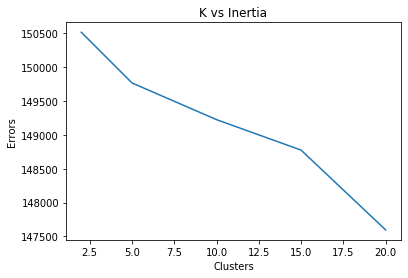

In [76]:
# plot k vs inertia_

plt.plot(clusters, inertia)
plt.xlabel('Clusters')
plt.ylabel('Errors')
plt.title('K vs Inertia')
plt.show()

In [77]:
Kmean = KMeans(n_clusters=15)
Kmean.fit(X_train_bow_5k)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=15, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [78]:
Kmean.n_clusters

15

In [79]:
Kmean.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [80]:
# Collect data points from each cluster
clusters_set = {i: np.where(Kmean.labels_ == i)[0] for i in range(Kmean.n_clusters)}

clusters_set

{0: array([   0,    1,    2, ..., 5459, 5460, 5461]),
 1: array([377]),
 2: array([   3,   45,   51,   66,   79,  135,  136,  192,  197,  225,  238,
         247,  254,  285,  290,  311,  317,  319,  362,  401,  430,  446,
         466,  500,  501,  539,  592,  613,  679,  683,  688,  699,  712,
         718,  731,  740,  743,  749,  754,  781,  807,  818,  834,  838,
         855,  857,  859,  875,  879,  980, 1087, 1120, 1130, 1134, 1143,
        1194, 1199, 1252, 1257, 1263, 1267, 1282, 1312, 1339, 1355, 1376,
        1386, 1407, 1423, 1462, 1465, 1501, 1512, 1540, 1580, 1597, 1598,
        1608, 1619, 1622, 1642, 1651, 1668, 1680, 1684, 1717, 1733, 1744,
        1800, 1812, 1848, 1856, 1870, 1891, 1912, 1914, 1947, 1948, 1952,
        1955, 1982, 2011, 2087, 2088, 2124, 2143, 2180, 2195, 2207, 2315,
        2323, 2328, 2340, 2345, 2378, 2391, 2402, 2407, 2440, 2446, 2453,
        2493, 2498, 2514, 2534, 2578, 2581, 2594, 2600, 2605, 2732, 2735,
        2736, 2763, 2787, 2789, 2815,

In [81]:
X_train_real.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_title',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'quantity', 'price',
       'clean_categories', 'clean_subcategories', 'essay', 'clean_essays',
       'clean_titles'],
      dtype='object')

In [82]:
# Collect easy text for word cloud
cluster_text_essay = dict()
for i in clusters_set:
    for j in clusters_set[i]:
        cluster_text_essay[i] = cluster_text_essay.get(i, '') + X_train_real.iloc[i]['clean_essays']     

In [83]:
print(len(cluster_text_essay[0]))
len(cluster_text_essay)

6899200


15

100%|██████████| 15/15 [00:17<00:00,  1.13s/it]


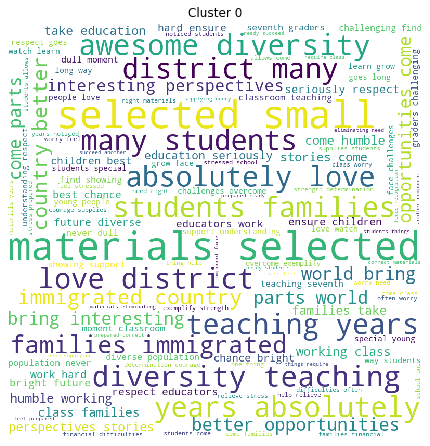

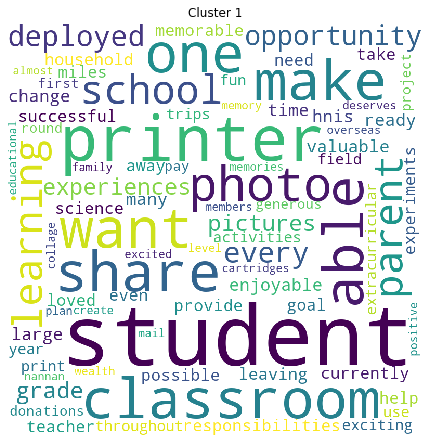

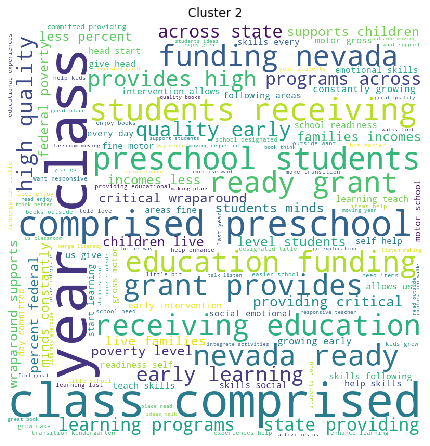

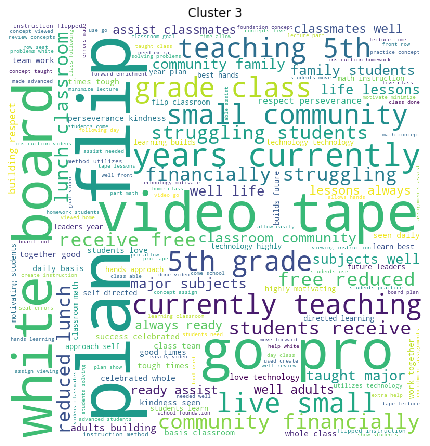

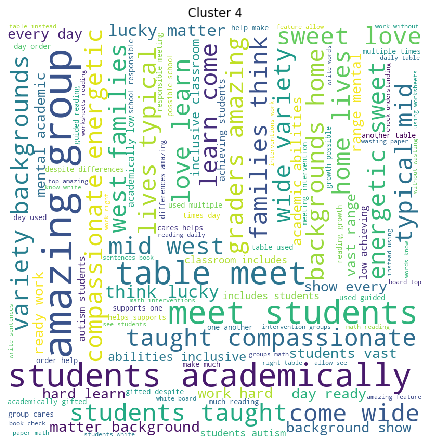

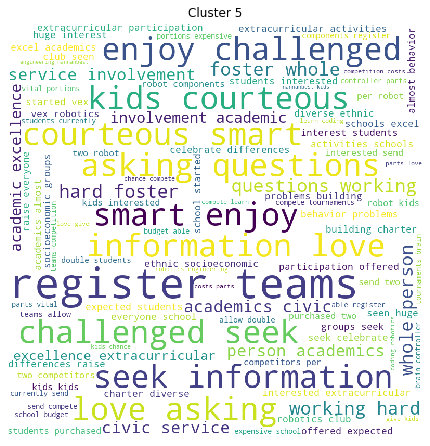

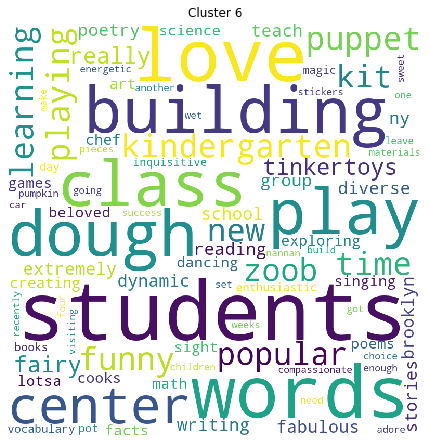

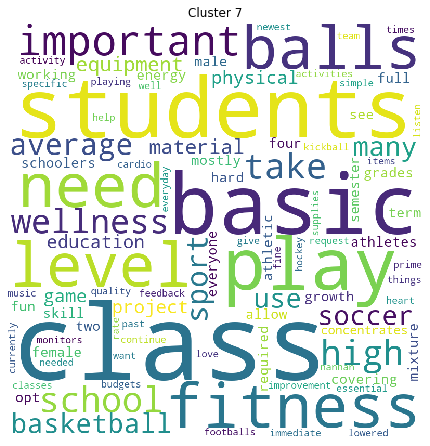

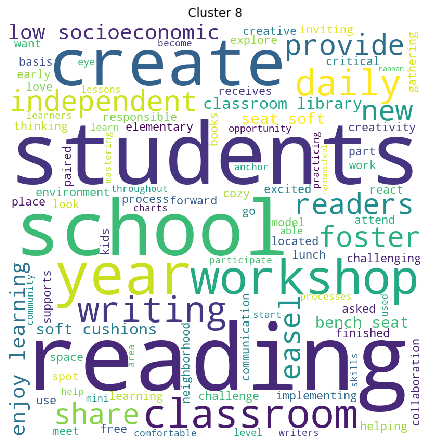

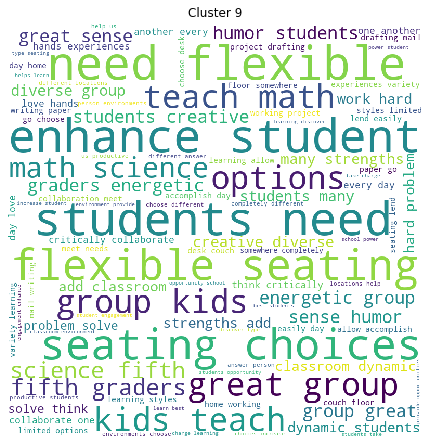

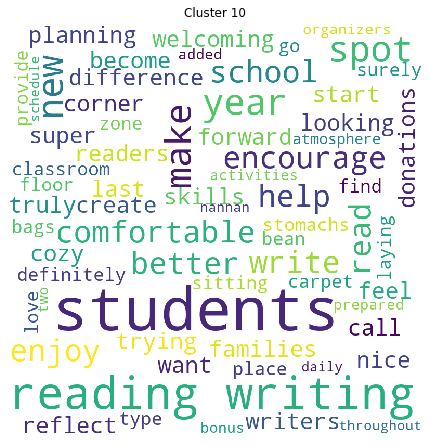

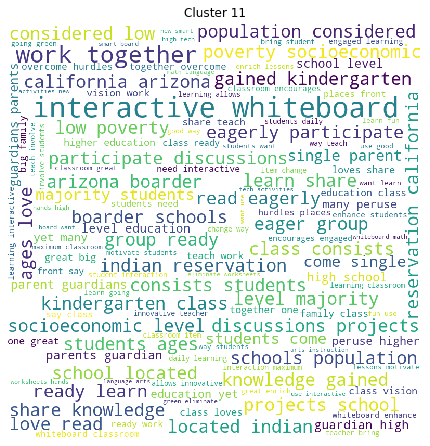

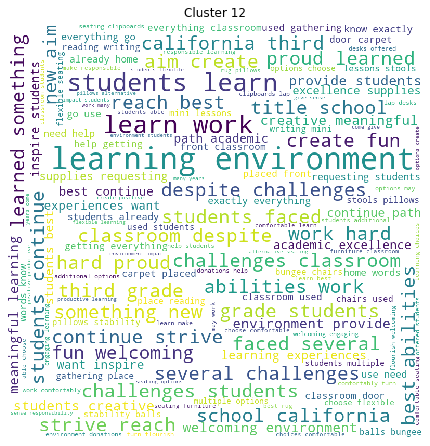

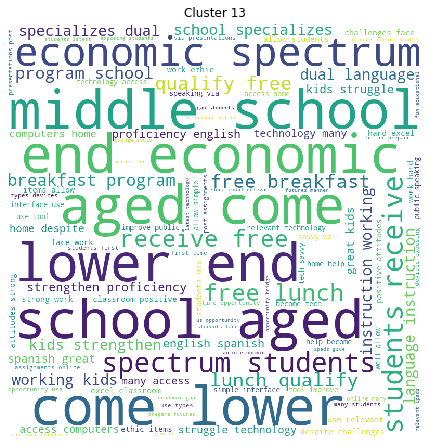

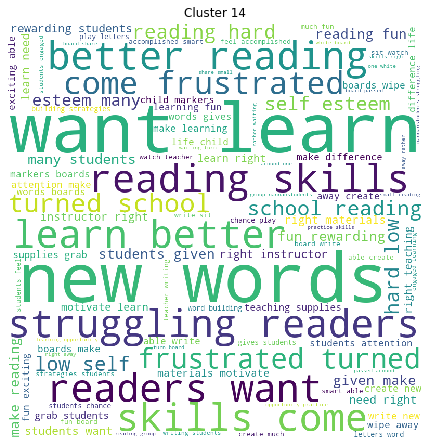

CPU times: user 16.7 s, sys: 1.5 s, total: 18.2 s
Wall time: 18.3 s


In [84]:
%%time
# create world cloud
from wordcloud import WordCloud, STOPWORDS 

for i in tqdm(cluster_text_essay):
    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white',
                    min_font_size = 10).generate(cluster_text_essay[i])

    # plot the WordCloud image
    plt.figure(figsize = (6, 6), facecolor = None)
    plt.imshow(wordcloud) 
    plt.axis("off")
    plt.title(f'Cluster {i}')
    plt.tight_layout(pad = 0)

plt.show()

In [85]:
from prettytable import PrettyTable
from collections import Counter

table = PrettyTable()
table.field_names = ["Cluster No", "No. of words in cluster", "Most frequent words"]

for key, val in cluster_text_essay.items():
    freq_dict = dict(sorted(list(Counter(val.split()).items()), key=lambda x: x[1], reverse=True))
    table.add_row([key, len(val.split()), ",".join(list(freq_dict.keys())[:10])])

print (table) 

+------------+-------------------------+------------------------------------------------------------------------------------+
| Cluster No | No. of words in cluster |                                Most frequent words                                 |
+------------+-------------------------+------------------------------------------------------------------------------------+
|     0      |          893201         |       students,materials,come,families,class,feel,small,teaching,years,love        |
|     1      |           119           |        students,printer,make,want,also,classroom,able,share,learning,school        |
|     2      |          46081          |      students,skills,year,learning,school,help,great,quality,early,providing       |
|     3      |           2091          |   students,class,well,classroom,instruction,assist,success,technology,plan,math    |
|     4      |           1193          |           students,table,would,amazing,reading,not,day,work,group,learn      

<h2>2.6 Apply AgglomerativeClustering</h2>

In [86]:
%%time
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

X_train_bow_5k_aggl = X_train_bow_5k.toarray()

clusters = [2, 3, 5, 7]
scores = []
for i in tqdm(clusters):
    print(f'Starting Cluster #{i}')
    aggl_cluster = AgglomerativeClustering(n_clusters=i)
    aggl_cluster.fit(X_train_bow_5k_aggl)
    
    score = silhouette_score(X_train_bow_5k_aggl, aggl_cluster.labels_, random_state=42)
    scores.append(score)

  0%|          | 0/4 [00:00<?, ?it/s]

Starting Cluster #2


 25%|██▌       | 1/4 [01:07<03:22, 67.40s/it]

Starting Cluster #3


 50%|█████     | 2/4 [02:14<02:14, 67.33s/it]

Starting Cluster #5


 75%|███████▌  | 3/4 [03:22<01:07, 67.50s/it]

Starting Cluster #7


100%|██████████| 4/4 [04:30<00:00, 67.78s/it]

CPU times: user 4min 34s, sys: 980 ms, total: 4min 35s
Wall time: 4min 30s


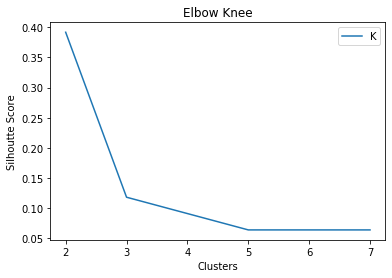

In [87]:
# plot k vs Silhoutte Score

plt.plot(clusters, scores)
plt.xlabel('Clusters')
plt.ylabel('Silhoutte Score')
plt.title('Elbow Knee')
plt.legend('Knee')
plt.show()

In [88]:
aggl_cluster = AgglomerativeClustering(n_clusters=3)
aggl_cluster.fit(X_train_bow_5k_aggl)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3,
                        pooling_func='deprecated')

In [89]:
aggl_cluster.n_clusters

3

In [90]:
aggl_cluster.labels_

array([2, 2, 2, ..., 2, 2, 2])

In [91]:
# Collect data points from each cluster
clusters_set = {i: np.where(aggl_cluster.labels_ == i)[0] for i in range(aggl_cluster.n_clusters)}

clusters_set

# Collect easy text for word cloud
cluster_text_essay = dict()
for i in clusters_set:
    for j in clusters_set[i]:
        cluster_text_essay[i] = cluster_text_essay.get(i, '') + X_train_real.iloc[i]['clean_essays']   


print(len(cluster_text_essay[0]))
len(cluster_text_essay)

87808


3

100%|██████████| 3/3 [00:04<00:00,  1.58s/it]


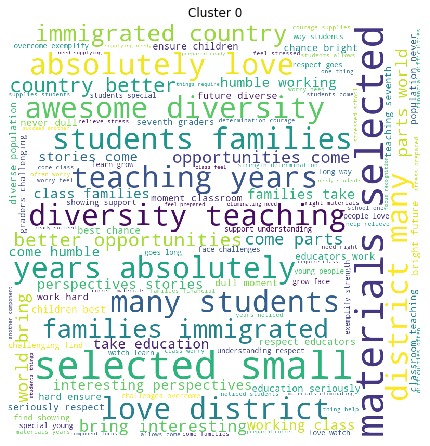

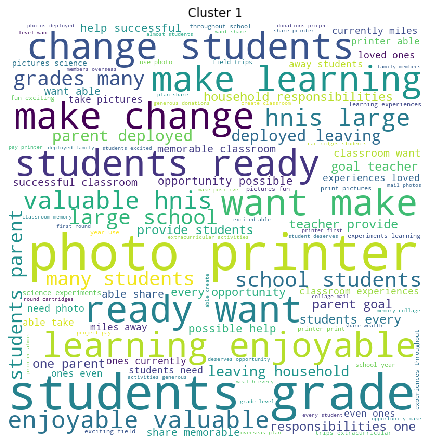

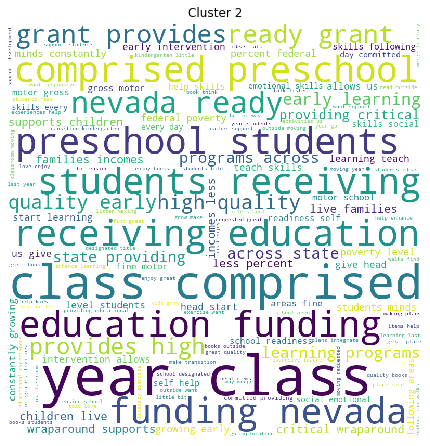

CPU times: user 4.58 s, sys: 378 ms, total: 4.96 s
Wall time: 4.98 s


In [92]:
%%time
# create world cloud
from wordcloud import WordCloud, STOPWORDS 

for i in tqdm(cluster_text_essay):
    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white',
                    min_font_size = 10).generate(cluster_text_essay[i])

    # plot the WordCloud image
    plt.figure(figsize = (6, 6), facecolor = None)
    plt.imshow(wordcloud) 
    plt.axis("off")
    plt.title(f'Cluster {i}')
    plt.tight_layout(pad = 0)

plt.show()

In [93]:
from prettytable import PrettyTable
from collections import Counter

table = PrettyTable()
table.field_names = ["Cluster No", "No. of words in cluster", "Most frequent words"]

for key, val in cluster_text_essay.items():
    freq_dict = dict(sorted(list(Counter(val.split()).items()), key=lambda x: x[1], reverse=True))
    table.add_row([key, len(val.split()), ",".join(list(freq_dict.keys())[:10])])

print (table) 

+------------+-------------------------+-------------------------------------------------------------------------+
| Cluster No | No. of words in cluster |                           Most frequent words                           |
+------------+-------------------------+-------------------------------------------------------------------------+
|     0      |          11369          |  students,materials,come,families,class,feel,small,teaching,years,love  |
|     1      |           3777          |   students,printer,make,want,also,classroom,able,share,learning,school  |
|     2      |          859841         | students,skills,year,learning,school,help,great,quality,early,providing |
+------------+-------------------------+-------------------------------------------------------------------------+


<h2>2.7 Apply DBSCAN</h2>

100%|██████████| 5000/5000 [02:40<00:00, 31.19it/s]


CPU times: user 2min 35s, sys: 1.25 s, total: 2min 36s
Wall time: 2min 41s


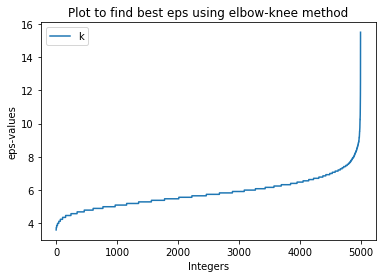

In [94]:
%%time
# citation https://www.kaggle.com/rohit0812/clustering-on-donors-choose-data-set
from sklearn.neighbors import KDTree

X_train_bow_5k_dbscan = X_train_bow_5k.todense()[:5000]

algo_title = 'DBSCAN Clustering'
minPts = 8
tree = KDTree(X_train_bow_5k_dbscan)

idx = 0
epss = []
for x_i in tqdm(X_train_bow_5k_dbscan):
    epss.append(tree.query(X_train_bow_5k_dbscan[idx], return_distance=True, k=minPts)[0][0][-1])
    idx += 1
epss.sort()

plt.plot(range(0,5000), epss[:5000])
plt.title("Plot to find best eps using elbow-knee method")
plt.xlabel('Integers')
plt.ylabel('eps-values')
plt.legend('kneee')

In [95]:
def getCorupusDict(essay_hot_info, y_pred):
    one_hot_featr, one_hot_enc = essay_hot_info
    one_hot_enc_cols = one_hot_enc.shape[1]
    corpus_dict = {}
    i = 0
    for each_x in tqdm(y_pred):
        if each_x not in corpus_dict: corpus_dict[each_x] = ''
        for j in range(one_hot_enc_cols):
            if one_hot_enc[i][j] >= 0.5:
                corpus_dict[each_x] = "%s %s"%(corpus_dict[each_x], one_hot_featr[j])
        i += 1
    
    return corpus_dict

In [96]:
from sklearn.cluster import DBSCAN

cluster = DBSCAN(eps=7, min_samples=minPts).fit(X_train_bow_5k_dbscan)
corpus_dict = getCorupusDict((X_train_bow_5k, X_train_bow_5k.toarray()), cluster.labels_)
print ("number of clusters gotten:", len(corpus_dict))

100%|██████████| 5000/5000 [12:55<00:00,  3.16it/s]

number of clusters gotten: 3


In [97]:
cluster.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [98]:
# Collect data points from each cluster
clusters_set = {i: np.where(cluster.labels_ == i)[0] for i in range(len(corpus_dict))}

clusters_set

# Collect easy text for word cloud
cluster_text_essay = dict()
for i in clusters_set:
    for j in clusters_set[i]:
        cluster_text_essay[i] = cluster_text_essay.get(i, '') + X_train_real.iloc[i]['clean_essays']   


print(len(cluster_text_essay[0]))
len(cluster_text_essay)

7360192


2

100%|██████████| 2/2 [00:04<00:00,  2.74s/it]


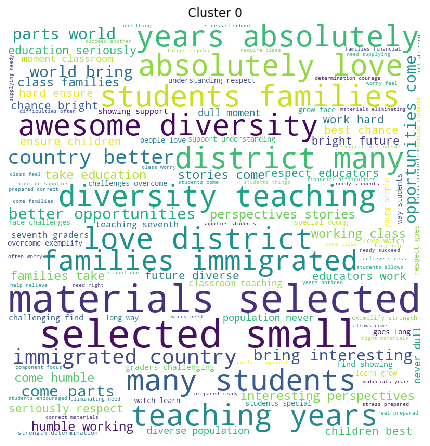

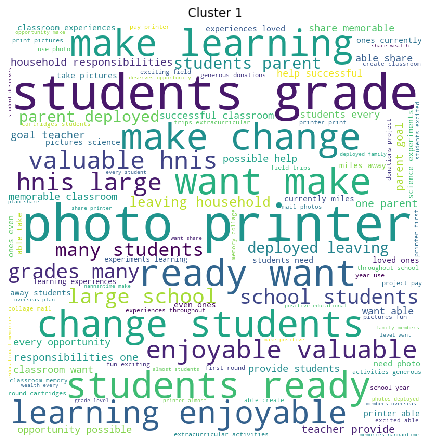

CPU times: user 4.37 s, sys: 362 ms, total: 4.74 s
Wall time: 4.81 s


In [99]:
%%time
# create world cloud
from wordcloud import WordCloud, STOPWORDS 

for i in tqdm(cluster_text_essay):
    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white',
                    min_font_size = 10).generate(cluster_text_essay[i])

    # plot the WordCloud image
    plt.figure(figsize = (6, 6), facecolor = None)
    plt.imshow(wordcloud) 
    plt.axis("off")
    plt.title(f'Cluster {i}')
    plt.tight_layout(pad = 0)

plt.show()

In [101]:
from prettytable import PrettyTable
from collections import Counter

table = PrettyTable()
table.field_names = ["Cluster No", "No. of words in cluster", "Most frequent words"]

for key, val in cluster_text_essay.items():
    freq_dict = dict(sorted(list(Counter(val.split()).items()), key=lambda x: x[1], reverse=True))
    table.add_row([key, len(val.split()), ",".join(list(freq_dict.keys())[:10])])

print (table) 

+------------+-------------------------+-----------------------------------------------------------------------+
| Cluster No | No. of words in cluster |                          Most frequent words                          |
+------------+-------------------------+-----------------------------------------------------------------------+
|     0      |          952883         | students,materials,come,families,class,feel,small,teaching,years,love |
|     1      |           1771          |  students,printer,make,want,also,classroom,able,share,learning,school |
+------------+-------------------------+-----------------------------------------------------------------------+


<h1>Conclusion</h1>

<h3>Select mutinomial navie bayes with BOW for best AUC</h3>
<h3>Select 5K best features using SelectFromModel</h3>
<h3>Kmeans</h3>
<h5>1. Train the model and plot K vs Inertia Plot</h5>
<h5>2. Select K=15 as best clusters using knee-elbow method</h5>
<h5>3. I found 1 cluster is very dense with 893201 words followed by 3 medium sized clusters</h5>
<h5>4. Plot word cloud for every cluster and show top words from each cluster</h5>
<h2>AgglomerativeClustering</h2>
<h5>1. Train the model and plot Silhoutte Score</h5>
<h5>2. Select 3 best clusters</h5>
<h5>3. I found 1 cluster is very dense</h5>
<h5>4. Plot word cloud for every cluster and show top words from each cluster</h5>
<h2>DBSCAN</h2>
<h5>1. Use KDtree to find best eps</h5>
<h5>2. I found two clusters with 0 and -1 label</h5>
<h5>3. Plot word cloud for every cluster and show top words from each cluster</h5>